In [1]:
# Imports
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import plotly.express as px

# Question 4

**Question: What effect does the change in price of fossil fuels have on their use?**

There are multiple ways to identify price changes in the fossil fuel sector. On the one hand we can look directly at (for example) gas price changes:

## Gas prices

Now we will look at the gas prices for the household and non household consumers in the year range from 2007 until the first semester of 2024. An average value of the price between all EU countries will be analyzed. If we were to look at individual member countries the workload would most certainly explde due to the seemingly endless possibilities of comparisons. This data has been taken from the eurostat website:
- Household: https://ec.europa.eu/eurostat/databrowser/product/page/NRG_PC_202
- Non-Household: https://ec.europa.eu/eurostat/web/products-datasets/-/nrg_pc_203

The data is measured in EUR per kilowatt-hour [KWH] excluding all taxes and levies, to make it more comparable.

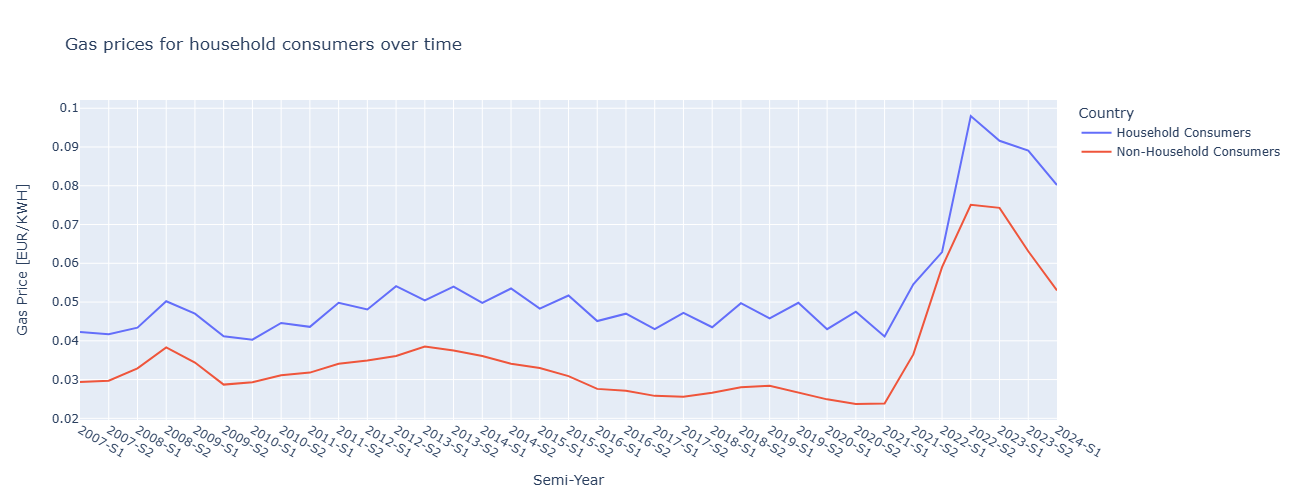

In [44]:
# reading the File for gas prices for household consumers
Raw_Gas_Prices_For_Household_Consumers = pd.read_excel("Data/Gas_Prices/Gas_Prices_For_Household_Consumers.xlsx", header=None)

# making the extracted data ready for plotting
To_Use_Gas_Prices_For_Household_Consumers = Raw_Gas_Prices_For_Household_Consumers.drop(labels=range(0,11))
To_Use_Gas_Prices_For_Household_Consumers = To_Use_Gas_Prices_For_Household_Consumers.drop(labels=range(49,len(Raw_Gas_Prices_For_Household_Consumers)))
To_Use_Gas_Prices_For_Household_Consumers.set_index(0, inplace=True)
To_Use_Gas_Prices_For_Household_Consumers.columns = To_Use_Gas_Prices_For_Household_Consumers.iloc[0]
To_Use_Gas_Prices_For_Household_Consumers.drop(['TIME', 'GEO (Labels)'], inplace=True)
To_Use_Gas_Prices_For_Household_Consumers.drop(To_Use_Gas_Prices_For_Household_Consumers.columns.values[pd.isna(To_Use_Gas_Prices_For_Household_Consumers.columns.values)], axis=1, inplace=True)
To_Use_Gas_Prices_For_Household_Consumers.replace(to_replace=":", value=np.nan, inplace=True)

# reading the File for gas prices for non-household consumers
Raw_Gas_Prices_For_Non_Household_Consumers = pd.read_excel("Data/Gas_Prices/Gas_Prices_For_Non_Household_Consumers.xlsx", header=None)

# making the extracted data ready for plotting
To_Use_Gas_Prices_For_Non_Household_Consumers = Raw_Gas_Prices_For_Non_Household_Consumers.drop(labels=range(0,11))
To_Use_Gas_Prices_For_Non_Household_Consumers = To_Use_Gas_Prices_For_Non_Household_Consumers.drop(labels=range(50,len(Raw_Gas_Prices_For_Non_Household_Consumers)))
To_Use_Gas_Prices_For_Non_Household_Consumers.set_index(0, inplace=True)
To_Use_Gas_Prices_For_Non_Household_Consumers.columns = To_Use_Gas_Prices_For_Non_Household_Consumers.iloc[0]
To_Use_Gas_Prices_For_Non_Household_Consumers.drop(['TIME', 'GEO (Labels)'], inplace=True)
To_Use_Gas_Prices_For_Non_Household_Consumers.drop(To_Use_Gas_Prices_For_Non_Household_Consumers.columns.values[pd.isna(To_Use_Gas_Prices_For_Non_Household_Consumers.columns.values)], axis=1, inplace=True)
To_Use_Gas_Prices_For_Non_Household_Consumers.replace(to_replace=":", value=np.nan, inplace=True)

# Extracting the information we want to plot
Gas_Prices = pd.DataFrame(index=(0,1), columns=To_Use_Gas_Prices_For_Household_Consumers.columns.values)
Gas_Prices.loc[0] = To_Use_Gas_Prices_For_Household_Consumers.loc['European Union - 27 countries (from 2020)'].values
Gas_Prices.loc[1] = To_Use_Gas_Prices_For_Non_Household_Consumers.loc['European Union - 27 countries (from 2020)'].values
Gas_Prices.index = ['Household Consumers', 'Non-Household Consumers']
Gas_Prices

# plotting
Gas_Prices = Gas_Prices.T.reset_index()
Gas_Prices = Gas_Prices.rename(columns={'index':'Semi-Year'})
Gas_Prices = Gas_Prices.melt(id_vars=['Semi-Year'], var_name='Country', value_name='Gas Price')
fig=px.line(
    Gas_Prices,
    x='Semi-Year',
    y='Gas Price',
    color='Country',
    title='Gas prices over time',
    labels={'Gas Price': 'Gas Price [EUR/KWH]', 'Semi-Year':'Semi-Year'}
)
fig.update_layout(width=1300, height=500)
fig.show()

As we can see, there are some diferences between those two prices. The Gas Price for household consumers is tendentially higher than the one for the non-household consumers.

Three points in time stand out as local maxima and one as a local minimum. We want to keep those time stamps in mind so that we can compare the trends of the different data sets we will explore to answer this question.
- Maximum at 2008-S2
- Maximum at 2013-S1
- Minimum at 2021-S1, directly before the steep increase
- Maximum at 2022-S2

The huge increase in gas prices is most likely caused by the war in Ukraine since Russia has been a major trading partner of europe, especially when it comes to fossil fuels like gas.

## Electricity Prices
On the other hand there also is the possibility to work with energy prices due to the fact that a huge portion of our energy supply still is produced using fossil fuels. We of course can distinguish here as well between household prices and non-household prices. And we can compare if this assumption is true by looking for similar maxima and minima as we noticed in the gas prices.
Sources:
- Household: https://ec.europa.eu/eurostat/web/products-datasets/-/nrg_pc_204
- Non-Household: https://ec.europa.eu/eurostat/web/products-datasets/-/nrg_pc_205

The dimension is EUR/KWH.

/users/paul.riedl/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/users/paul.riedl/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



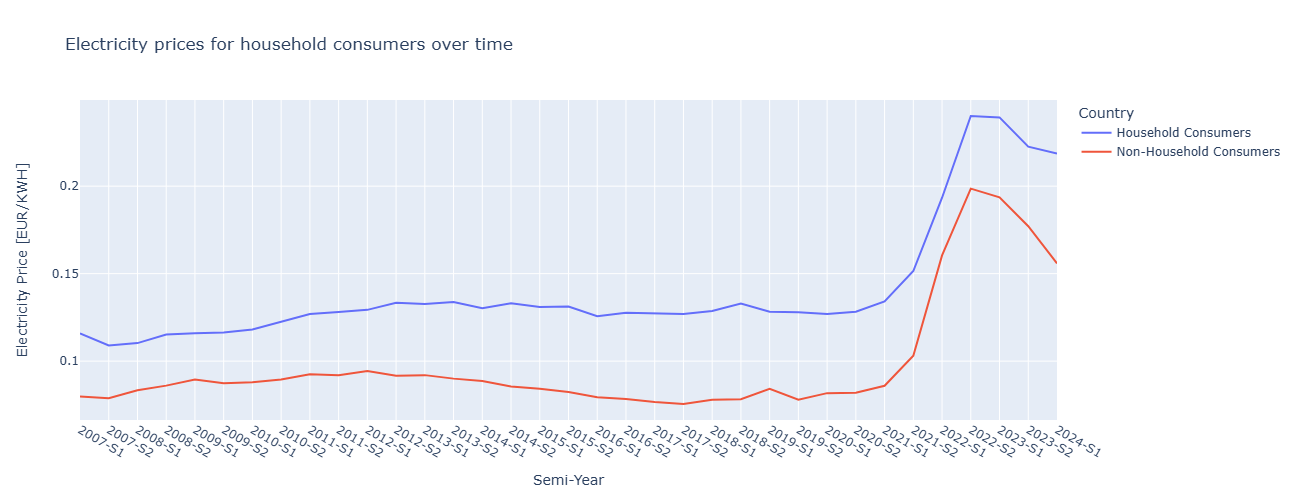

In [45]:
# reading the File for electicity prices for household consumers
Raw_Electricity_Prices_For_Household_Consumers = pd.read_excel("Data/Energy_Prices/Electricity_Prices_For_Household_Consumers.xlsx", header=None)

# making the extracted data ready for plotting
To_Use_Electricity_Prices_For_Household_Consumers = Raw_Electricity_Prices_For_Household_Consumers.drop(labels=range(0,11))
To_Use_Electricity_Prices_For_Household_Consumers = To_Use_Electricity_Prices_For_Household_Consumers.drop(labels=range(56,len(Raw_Electricity_Prices_For_Household_Consumers)))
To_Use_Electricity_Prices_For_Household_Consumers.set_index(0, inplace=True)
To_Use_Electricity_Prices_For_Household_Consumers.columns = To_Use_Electricity_Prices_For_Household_Consumers.iloc[0]
To_Use_Electricity_Prices_For_Household_Consumers.drop(['TIME', 'GEO (Labels)'], inplace=True)
To_Use_Electricity_Prices_For_Household_Consumers.drop(To_Use_Electricity_Prices_For_Household_Consumers.columns.values[pd.isna(To_Use_Electricity_Prices_For_Household_Consumers.columns.values)], axis=1, inplace=True)
To_Use_Electricity_Prices_For_Household_Consumers.replace(to_replace=":", value=np.nan, inplace=True)

# reading the File for electicity prices for non household consumers
Raw_Electricity_Prices_For_Non_Household_Consumers = pd.read_excel("Data/Energy_Prices/Electricity_Prices_For_Non_Household_Consumers.xlsx", header=None)

# making the extracted data ready for plotting
To_Use_Electricity_Prices_For_Non_Household_Consumers = Raw_Electricity_Prices_For_Non_Household_Consumers.drop(labels=range(0,11))
To_Use_Electricity_Prices_For_Non_Household_Consumers = To_Use_Electricity_Prices_For_Non_Household_Consumers.drop(labels=range(56,len(Raw_Electricity_Prices_For_Non_Household_Consumers)))
To_Use_Electricity_Prices_For_Non_Household_Consumers.set_index(0, inplace=True)
To_Use_Electricity_Prices_For_Non_Household_Consumers.columns = To_Use_Electricity_Prices_For_Non_Household_Consumers.iloc[0]
To_Use_Electricity_Prices_For_Non_Household_Consumers.drop(['TIME', 'GEO (Labels)'], inplace=True)
To_Use_Electricity_Prices_For_Non_Household_Consumers.drop(To_Use_Electricity_Prices_For_Non_Household_Consumers.columns.values[pd.isna(To_Use_Electricity_Prices_For_Non_Household_Consumers.columns.values)], axis=1, inplace=True)
To_Use_Electricity_Prices_For_Non_Household_Consumers.replace(to_replace=":", value=np.nan, inplace=True)

# Extracting the for us relevant information
Electricity_Prices = pd.DataFrame(columns=To_Use_Electricity_Prices_For_Household_Consumers.columns.values)
Electricity_Prices.loc[0] = To_Use_Electricity_Prices_For_Household_Consumers.loc['European Union - 27 countries (from 2020)'].values
Electricity_Prices.loc[1] = To_Use_Electricity_Prices_For_Non_Household_Consumers.loc['European Union - 27 countries (from 2020)'].values
Electricity_Prices.index = ['Household Consumers', 'Non-Household Consumers']
Electricity_Prices

# plotting
Electricity_Prices = Electricity_Prices.T.reset_index()
Electricity_Prices = Electricity_Prices.rename(columns={'index':'Semi-Year'})
Electricity_Prices = Electricity_Prices.melt(id_vars=['Semi-Year'], var_name='Country', value_name='Electricity Price')
fig=px.line(
    Electricity_Prices,
    x='Semi-Year',
    y='Electricity Price',
    color='Country',
    title='Electricity prices over time',
    labels={'Electricity Price': 'Electricity Price [EUR/KWH]', 'Semi-Year':'Semi-Year'}
)
fig.update_layout(width=1300, height=500)
fig.show()

The energy prices are also pretty stable from 2007 until the end of 2020. 2021 also, just like in the gas price marks the beginning of the steep rise. This steep rise is again most likely caused by the war in Ukraine and the resulting european boycott of russian goods.
Here we can see that not all price maxima/minima of the gas prices are reflected in the electricity prices, after all the energy production is not only dependend on gas.

## Consumption

Now we want to look at the energy Consumption, again devided into the electricity and gas consumption. We will be looking at the Inland consumption, not on the total consumption of all EU mmber staes because of the fact that earlier we also looked into data averaged across all countries, not all o them summed up.

/users/paul.riedl/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



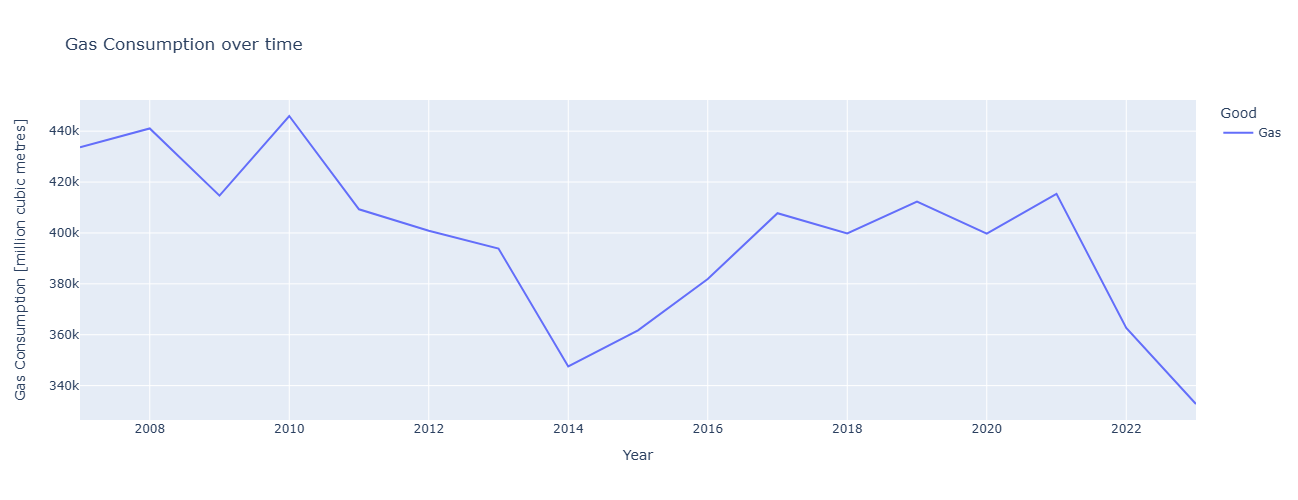

In [119]:
Raw_Inland_Gas_Consumption = pd.read_excel('Data/Consumption/Inland_Consumption_Gas.xlsx', header=9)
Raw_Inland_Gas_Consumption.drop([0,2,3,4], inplace=True)
Raw_Inland_Gas_Consumption.set_index('TIME', inplace=True)
Raw_Inland_Gas_Consumption.index.name = 'Country'
Raw_Inland_Gas_Consumption = Raw_Inland_Gas_Consumption.loc[:, ~Raw_Inland_Gas_Consumption.columns.str.contains('^Unnamed:')]
Raw_Inland_Gas_Consumption.columns = range(1990,2024)
Raw_Inland_Gas_Consumption.drop(range(1990,2007),axis=1, inplace=True)

Gas_Consumption = pd.DataFrame(columns=Raw_Inland_Gas_Consumption.columns.values)
Gas_Consumption.loc[0] = Raw_Inland_Gas_Consumption.iloc[0]
Gas_Consumption.index = ['Gas']

# plotting
Gas_Consumption = Gas_Consumption.T.reset_index()
Gas_Consumption = Gas_Consumption.rename(columns={'index':'Year'})
Gas_Consumption = Gas_Consumption.melt(id_vars=['Year'], var_name='Good', value_name='Gas Consumption')
Gas_Consumption
fig=px.line(
    Gas_Consumption,
    x='Year',
    y='Gas Consumption',
    color='Good',
    title='Gas Consumption over time',
    labels={'Gas Consumption': 'Gas Consumption [million cubic metres]', 'Year':'Year'}
)
fig.update_layout(width=1300, height=500)
fig.show()

We see that the consumption fell once in the year 2014, right after the slight price increase in 2013 that we saw earlier. The more noticable connection between the gas price and the consumption happened in 2021, when the consumption plummeted after the price increase in that year. One obvious reason for that are the sanctions the EU has ordered upon gas that has been imported from russia essentially banning it from the european market.

/users/paul.riedl/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



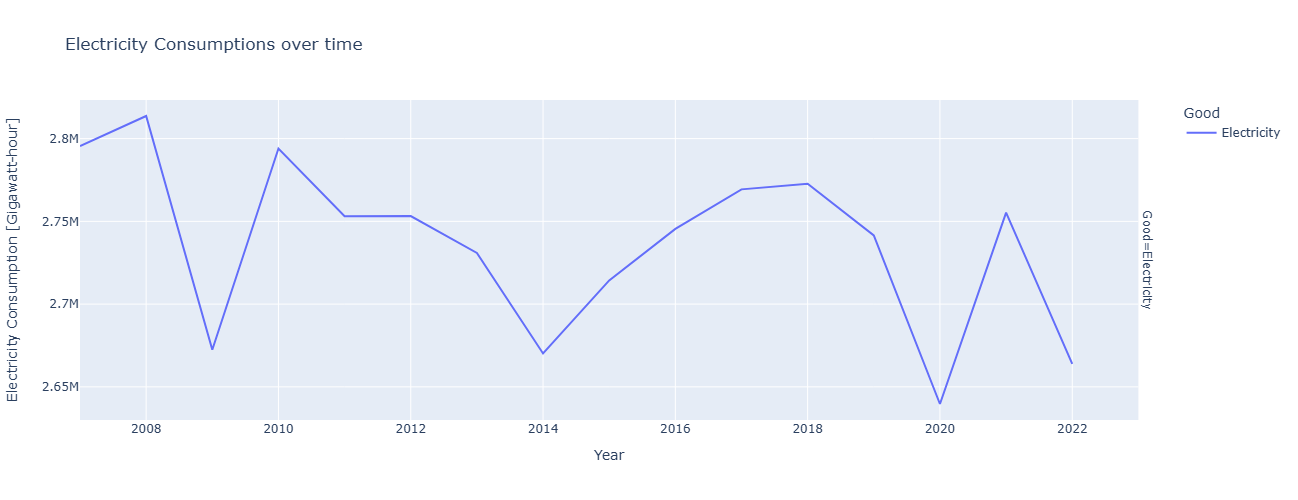

In [120]:
Raw_Inland_Electricity_Consumption = pd.read_excel('Data/Consumption/Inland_Energy_Demand_Yearly.xlsx', header=9)
Raw_Inland_Electricity_Consumption.drop([0,2,3,4], inplace=True)
Raw_Inland_Electricity_Consumption.set_index('TIME', inplace=True)
Raw_Inland_Electricity_Consumption.index.name = 'Country'
Raw_Inland_Electricity_Consumption = Raw_Inland_Electricity_Consumption.loc[:, ~Raw_Inland_Electricity_Consumption.columns.str.contains('^Unnamed:')]
Raw_Inland_Electricity_Consumption.columns = range(1990,2024)
Raw_Inland_Electricity_Consumption.drop(range(1990,2007),axis=1, inplace=True)

Consumption = pd.DataFrame(columns=Raw_Inland_Electricity_Consumption.columns.values)
Consumption.loc[0] = Raw_Inland_Electricity_Consumption.iloc[0]
Consumption.index = ['Electricity']

# plotting
Consumption = Consumption.T.reset_index()
Consumption = Consumption.rename(columns={'index':'Year'})
Consumption = Consumption.melt(id_vars=['Year'], var_name='Good', value_name='Electricity Consumption')
Consumption
fig=px.line(
    Consumption,
    x='Year',
    y='Electricity Consumption',
    facet_row = 'Good',
    color='Good',
    title='Electricity Consumptions over time',
    labels={'Electricity Consumption': 'Electricity Consumption [Gigawatt-hour]', 'Year':'Year'}
)
fig.update_layout(width=1300, height=500)
fig.show()

As for the electricity consumption one can immediately see that the need of this good is definitely not as stable as the gas consumption. We do however also see the drop in 2014 which falls perfectly together with the decrease in the gas consumption. We do not have any data on 2023 yet, but there is a sign of a plummet like in the gas consumption with a second minimum shortly before, in 2020. The reasons for the grave instability would have to be further discussed, but that is not part of this section. One more thing to mention is that if we look at a longer time duration the de- and increases in the consumption seem very minor to the exploding demand since 1990.